In [10]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd

# Path to TensorBoard log files
log_dir = 'training_results/experiment_all_normalized_kaiming_4-2'

# Initialize an event accumulator
ea = event_accumulator.EventAccumulator(log_dir,
    size_guidance={event_accumulator.SCALARS: 0})

ea.Reload() # Loads the log data

# Get all scalar tags
tags = ea.Tags()['scalars']

# Extract scalar data and convert to pandas DataFrame
dataframes = {}
for tag in tags:
    events = ea.Scalars(tag)
    values = [event.value for event in events]
    steps = [event.step for event in events]
    dataframes[tag] = pd.DataFrame(data={'step': steps, tag: values})

for tag, df in dataframes.items():
    print(f"Data for {tag}:")
    print(df.head())  # Print first few rows


# Merge all dataframes on 'step'
merged_df = pd.concat(dataframes.values(), axis=1).loc[:,~pd.concat(dataframes.values(), axis=1).columns.duplicated()]


Data for Loss/Train:
   step  Loss/Train
0     0    0.700718
1     1    0.660644
2     2    0.654069
3     3    0.641275
4     4    0.637236
Data for Accuracy/Train:
   step  Accuracy/Train
0     0        0.558036
1     1        0.613393
2     2        0.625893
3     3        0.641071
4     4        0.633036
Data for Precision/Train:
   step  Precision/Train
0     0         0.526882
1     1         0.591633
2     2         0.606855
3     3         0.621782
4     4         0.615385
Data for Recall/Train:
   step  Recall/Train
0     0      0.560000
1     1      0.565714
2     2      0.573333
3     3      0.598095
4     4      0.579048
Data for F1_Score/Train:
   step  F1_Score/Train
0     0        0.542936
1     1        0.578384
2     2        0.589618
3     3        0.609709
4     4        0.596663
Data for ROC_AUC/Train:
   step  ROC_AUC/Train
0     0       0.558151
1     1       0.610588
2     2       0.622801
3     3       0.638543
4     4       0.629860
Data for Loss/Validation:
  

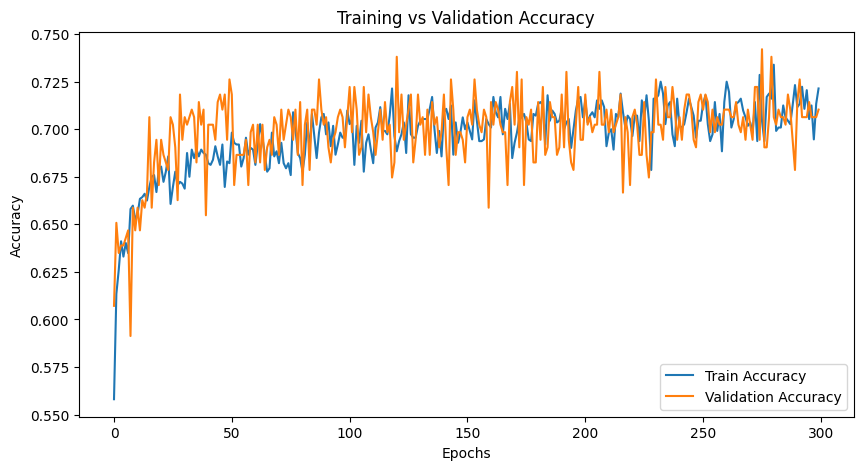

In [11]:
import matplotlib.pyplot as plt

# Example: Plotting Training and Validation Accuracy on the same plot
plt.figure(figsize=(10, 5))
plt.plot(merged_df['step'], merged_df['Accuracy/Train'], label='Train Accuracy')
plt.plot(merged_df['step'], merged_df['Accuracy/Validation'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


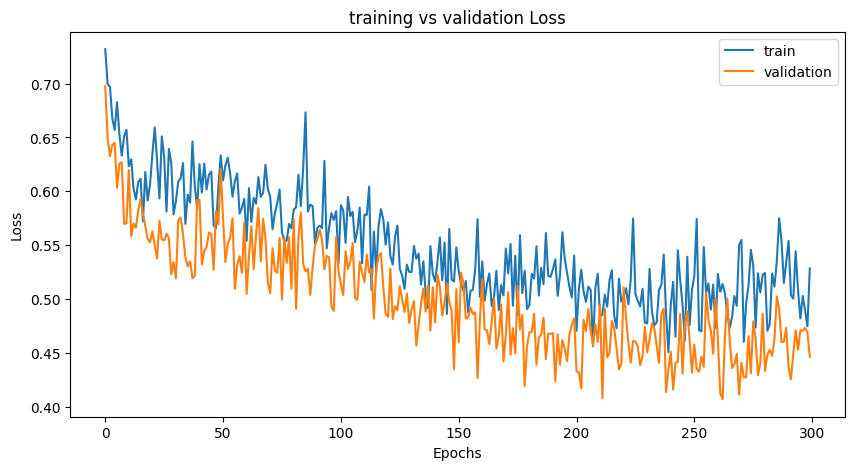

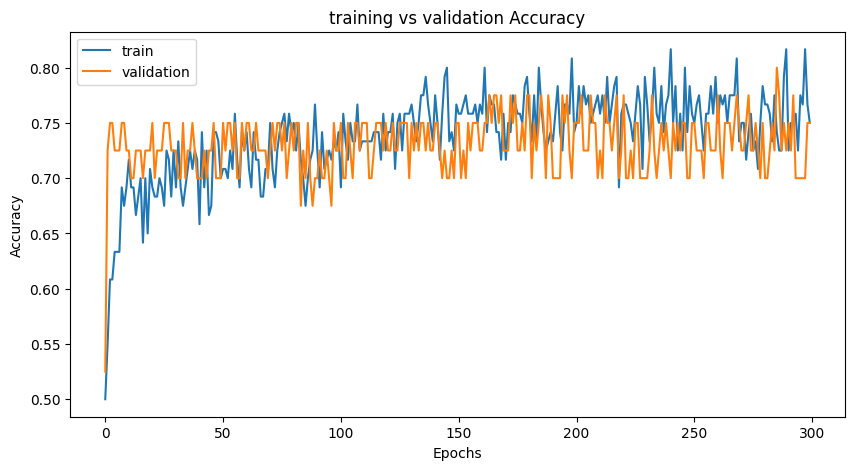

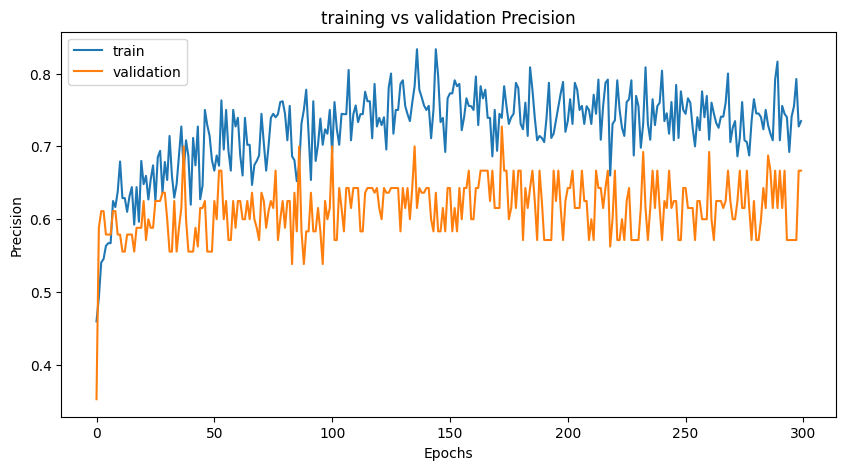

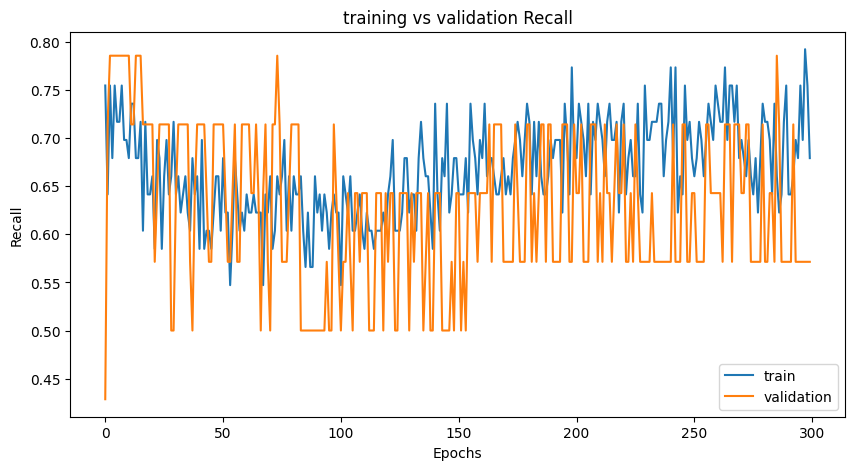

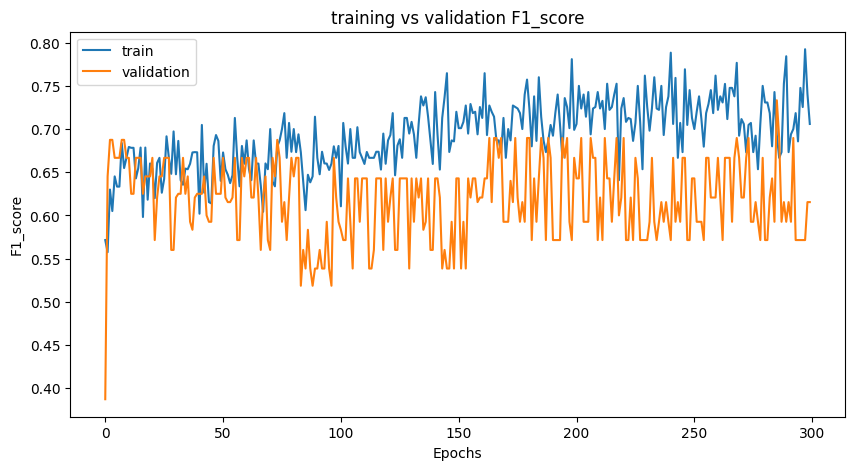

In [23]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to TensorBoard log files
log_dir = 'training_results/solo_train_n_solo__pred_t30a67uq_normalized_kaiming_4-2_EEGNet/'
save_dir = 'saved_plots'  # Directory to save the plots
os.makedirs(save_dir, exist_ok=True)  # Create the save directory if it doesn't exist

# Initialize an event accumulator
ea = event_accumulator.EventAccumulator(log_dir, size_guidance={event_accumulator.SCALARS: 0})
ea.Reload()  # Loads the log data

# Get all scalar tags
tags = ea.Tags()['scalars']

# Extract scalar data and convert to pandas DataFrame
dataframes = {}
for tag in tags:
    events = ea.Scalars(tag)
    values = [event.value for event in events]
    steps = [event.step for event in events]
    dataframes[tag] = pd.DataFrame(data={'step': steps, tag: values})

# Plotting training and validation metrics and saving the plots
train_tags = [t for t in tags if 'train' in t]

for train_tag in train_tags:
    val_tag = train_tag.replace('train', 'validation')
    if val_tag in tags:  # Check if the corresponding validation tag exists
        plt.figure(figsize=(10, 5))  # Create a new figure for each metric
        train_df = dataframes[train_tag]
        val_df = dataframes[val_tag]
        # Merge the training and validation data on 'step'
        merged_df = pd.merge(train_df, val_df, on='step', suffixes=('_train', '_validation'))
        # Plot the training and validation metrics
        plt.plot(merged_df['step'], merged_df[train_tag], label='train')
        plt.plot(merged_df['step'], merged_df[val_tag], label='validation')
        plt.xlabel('Epochs')
        plt.ylabel(train_tag.replace('/train', ''))
        plt.title(f'training vs validation {train_tag.replace("/train", "")}')
        plt.legend()
        # Save the figure
        plot_filename = f'{train_tag.replace("/train", "").replace("/", "_")}_plot.png'
        plt.savefig(os.path.join(save_dir, plot_filename))
        # Display the figure
        plt.show()
